### Machine Learning with scikit-learn ##

Article for this notebooks is located here: http://blog.brakmic.com/data-science-for-losers-part-4-machine-learning/

In [3]:
import sklearn

***The Iris data set***

This is one of the many available "toy" data sets for learning scikit-learn

In [4]:
#alternatively load Iris data set from CSV
#iris = pd.read_csv('iris-data.csv')
#iris.columns

#sklearn offers many data sets
# just use dir on sklearn.datasets to see what's in there: dir(sklearn.datasets)
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [7]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'get_data_home',
 'lfw',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_lfw_pairs',
 'load_lfw_people',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s

In [8]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [9]:
#first 10 entries from data
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [10]:
#the targets (classes/categories)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


We split the iris data set into data (the matrix containing the instances with their respective features) and a vector of outcomes (targets)

In [23]:
X, y = iris.data, iris.target

In [14]:
num_samples, num_features = X.shape

In [15]:
print(num_samples, num_features)

(150L, 4L)


In [16]:
print(type(X))
print(type(y))

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [17]:
print(iris.data.shape)

(150L, 4L)


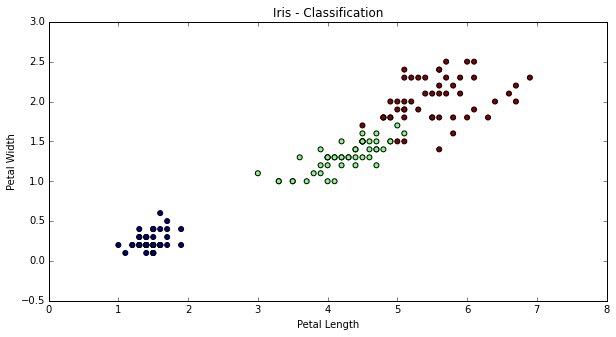

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))

x = X[:, 2]
y = X[:, 3]
iris_spec = iris.target

plt.title('Iris - Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(x, y, c=iris_spec, marker='.', s=100)

**K-Nearest Neighbor Classifier**

We are using one of the simplest ML algorithms which calculates the closest distances between samples. We can arbitrarily set the amount of "neighbors" which should be used to measure distances. kNN tries to predict a label of a sample by checking the existing labels of its closest "neighbors". There exist different metrics to calculate distances, like Euclidean, Manhattan, Chebychev, Minkowski etc.)

**Initializing kNN**

*We set the amount of neighbors to 1 and use defaults for all other variables*

Also, we import the **train_test_split** and **cross_val_score functions** which we'll be using to generate valid training/testing data and to check our final results.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')


*We split our data into four blocks*
- The first two are training an testing matrices
- The last two are training and testing labels (vectors)

In [29]:
id_train, id_test, il_train, il_test = train_test_split(X, y)

*We now let our model "consume" the training data so it can adapt to it accordingly*

In [30]:
knn.fit(id_train, il_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

We now use our trained model to predict the outcome based on the testing data (this data represents the "future data sets")

In [31]:
knn.predict(id_test)

array([2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1])

*We can also generate "probabilistic predictions"*

Here the model calculates that the given set of features has 20% chance of being "setosa", 60% "versicolor", and 20% "virginica".

In [34]:
knn.predict_proba([[2,5,3,4],])

array([[ 0.2,  0.6,  0.2]])

Now we can compare the testing labels with the labels our model predicted. Without calling any comparison methods we can see that the two arrays contain almost similar entries.

In [73]:
#print out the real values (flower categories)
il_test

array([2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2])

But of course, we should use some proper method for testing the performance of our model. 

Therefore we call the **cross_val_score** method by giving it our trained model, the original data and targets. The last parameter sets the amount of validations.

In [74]:
cross_val_score(knn, iris.data, iris.target, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

**Logistic Regression**

In [98]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_regr = LogisticRegression()
log_regr.fit(id_train, il_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [108]:
log_regr.predict(id_test)

array([2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2])

In [107]:
log_regr.score(id_test,il_test)

0.89473684210526316